# Heart Disease Prediction: Machine Learning Project

**Introduction:**

This machine learning project aims to predict the likelihood of heart disease in individuals based on a variety of health-related parameters. The dataset consists of multiple features that are known to influence heart health, and the model classifies individuals into different categories based on the risk of heart disease.

## The features of the dataset are:
1. **Age:** The age of the individual.
2. **Gender:** The gender of the individual.
3. **Blood Pressure:** The individual’s blood pressure levels.
4. **Cholesterol Level:** The levels of cholesterol (both HDL and LDL) in the individual's blood.
5. **Exercise Habits:** The frequency of exercise undertaken by the individual.
6. **Smoking:** Whether the individual smokes or not.
7. **Family Heart Disease:** Whether the individual has a family history of heart disease.
8. **Diabetes:** Whether the individual has diabetes.
9. **BMI:** The body mass index of the individual, indicating whether they are overweight or underweight.
10. **High Blood Pressure:** Whether the individual has high blood pressure.
11. **Low HDL Cholesterol:** Whether the individual has low levels of HDL cholesterol.
12. **High LDL Cholesterol:** Whether the individual has high levels of LDL cholesterol.
13. **Alcohol Consumption:** The individual’s alcohol consumption habits.
14. **Stress Level:** The level of stress experienced by the individual.
15. **Sleep Hours:** The number of hours the individual sleeps on average per night.
16. **Sugar Consumption:** The individual’s sugar consumption levels.
17. **Triglyceride Level:** The levels of triglycerides in the individual’s blood.
18. **Fasting Blood Sugar:** The individual’s fasting blood sugar level.
19. **CRP Level:** The C-reactive protein levels in the individual’s blood, which may indicate inflammation.
20. **Homocysteine Level:** The homocysteine level in the individual’s blood, which can indicate the risk of cardiovascular diseases.

#### The target variable is 'Heart Disease Status' with the following categories:
1. **No:** The individual does not have heart disease.
2. **Yes:** The individual has been diagnosed with heart disease.


Necessary Imports

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Reading The Data Set

In [117]:
import pandas as pd
data=pd.read_csv('heart_disease.csv')
data

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


Now We Do Some EDA On This Dataset For Better Understanding The Dataset

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

Checking For Null Values

In [119]:
data.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

We can observe that there are some entries with null values. These are error entries, so these entries are dropped

In [ ]:
data=data.dropna(axis=0)
data.shape

Checking The Class Distribution of Categoric Columns 

In [89]:
d=data.select_dtypes(include=['object']).columns

for i in d:
    print(i)
    print(data[i].value_counts())

Gender
Gender
Male      3564
Female    3503
Name: count, dtype: int64
Exercise Habits
Exercise Habits
High      2413
Medium    2336
Low       2318
Name: count, dtype: int64
Smoking
Smoking
Yes    3634
No     3433
Name: count, dtype: int64
Family Heart Disease
Family Heart Disease
No     3540
Yes    3527
Name: count, dtype: int64
Diabetes
Diabetes
No     3551
Yes    3516
Name: count, dtype: int64
High Blood Pressure
High Blood Pressure
Yes    3561
No     3506
Name: count, dtype: int64
Low HDL Cholesterol
Low HDL Cholesterol
Yes    3540
No     3527
Name: count, dtype: int64
High LDL Cholesterol
High LDL Cholesterol
No     3608
Yes    3459
Name: count, dtype: int64
Alcohol Consumption
Alcohol Consumption
Medium    2391
Low       2371
High      2305
Name: count, dtype: int64
Stress Level
Stress Level
Medium    2411
Low       2334
High      2322
Name: count, dtype: int64
Sugar Consumption
Sugar Consumption
Low       2403
High      2379
Medium    2285
Name: count, dtype: int64
Heart Disease 

checking For Outliers In Each Columns

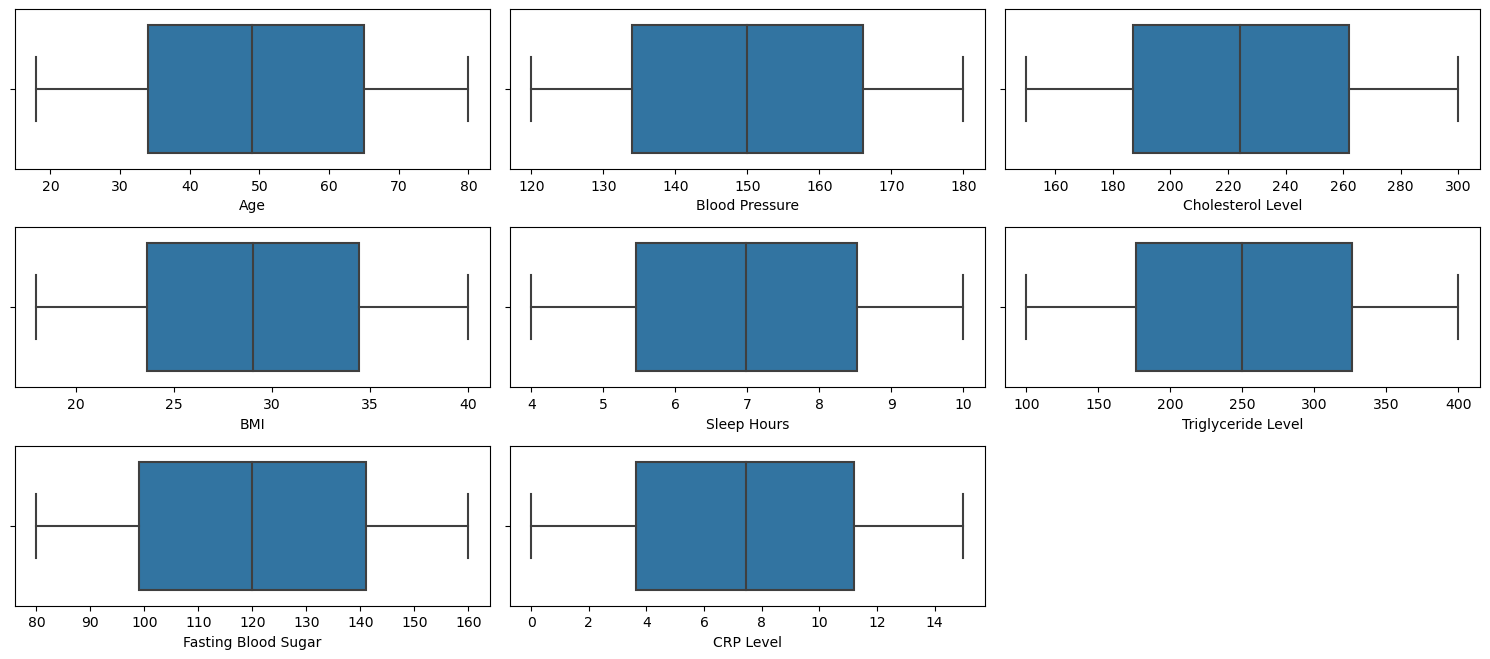

In [91]:
plt.figure(figsize=(15,15))
columns=data.select_dtypes(include=np.number).columns[:-1]
for count, col in enumerate(columns) :
    plt.subplot(7,3,count+1)
    sns.boxplot(data=data, x=col)
plt.tight_layout()
plt.show()

checking For Correlation

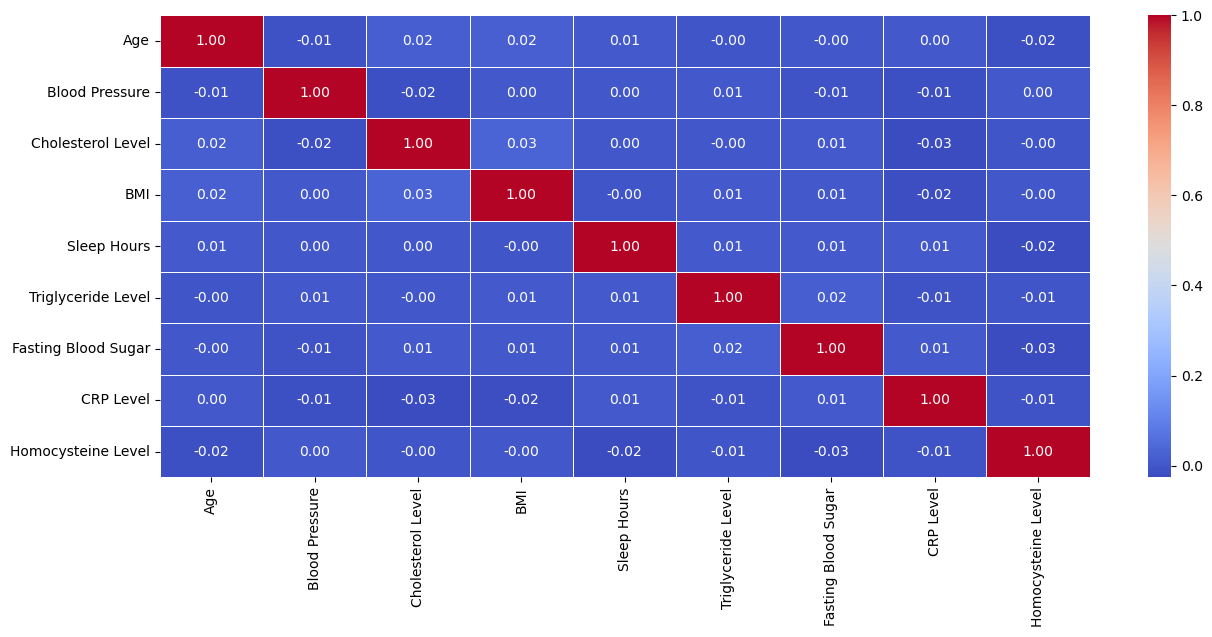

In [92]:
cols=data.select_dtypes(include=np.number).columns
df=data[cols]
crr=df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(crr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.show()

Splitting the features and target variables

In [93]:
x=data.drop(['Heart Disease Status'],axis=1)
y=data['Heart Disease Status']

Converting Categoric Columns into Numeric

In [95]:
from sklearn.preprocessing import LabelEncoder
gender_Encoder = LabelEncoder()
excercise_Encoder = LabelEncoder()
smoking_Encoder = LabelEncoder()
family_Encoder = LabelEncoder()
diabetes_Encoder = LabelEncoder()
high_bp_Encoder = LabelEncoder()
low_hdl_Encoder = LabelEncoder()
high_hdl_Encoder = LabelEncoder()
alcohol_Encoder = LabelEncoder()
stress_Encoder = LabelEncoder()
sugar_Encoder = LabelEncoder()
y_Encoder=LabelEncoder()
x['Gender'] = gender_Encoder.fit_transform(x['Gender'])
x['Exercise Habits'] = excercise_Encoder.fit_transform(x['Exercise Habits'])
x['Smoking'] = smoking_Encoder.fit_transform(x['Smoking'])
x['Family Heart Disease'] = family_Encoder.fit_transform(x['Family Heart Disease'])
x['Diabetes'] = diabetes_Encoder.fit_transform(x['Diabetes'])
x['High Blood Pressure'] = high_bp_Encoder.fit_transform(x['High Blood Pressure'])
x['Low HDL Cholesterol'] = low_hdl_Encoder.fit_transform(x['Low HDL Cholesterol'])
x['High LDL Cholesterol'] = high_hdl_Encoder.fit_transform(x['High LDL Cholesterol'])
x['Alcohol Consumption'] = alcohol_Encoder.fit_transform(x['Alcohol Consumption'])
x['Stress Level'] = stress_Encoder.fit_transform(x['Stress Level'])
x['Sugar Consumption'] = sugar_Encoder.fit_transform(x['Sugar Consumption'])
y = y_Encoder.fit_transform(y)

In [96]:
column_names=list(data.columns)
column_names.pop(-1)
print(column_names)

['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sleep Hours', 'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']


Using Column Transformer To Convert Categoric Columns In To Multiple Columns 

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(
    transformers=[
        ('Onehot', OneHotEncoder(drop='first'),['Exercise Habits','Alcohol Consumption','Stress Level','Sugar Consumption'])
    ], remainder='passthrough'
)

x=ct.fit_transform(x)

Splitting The Training And Testing Data 

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Scaling The Values Of x For The Algorithms That Required Scaled x Values

In [99]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

1.<strong> Decision Tree Classifier </strong>

In [100]:
dtc=DecisionTreeClassifier()
param_dtc = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2'],  
    'splitter': ['best', 'random'],  
}

gridCLF=GridSearchCV(dtc, param_dtc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(X_train, y_train)
# print("The best parameters are:")
# print(gridCLF.best_params_)
# {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}

2.<strong> Random Forest Classifier </strong>

In [101]:
rfc = RandomForestClassifier()

param_rfc = {
    'n_estimators': [100, 150],  
    'max_depth': [None, 10],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False], 
    'criterion': ['gini', 'entropy']  
}


gridCLF = GridSearchCV(rfc, param_rfc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(X_train, y_train)
# print("The best parameters are:")
# print(gridCLF.best_params_)
# {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

3. <strong>KNN Classifier </strong>

In [102]:
knn = KNeighborsClassifier()


param_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 20, 30, 40] 
}


gridCLF = GridSearchCV(knn, param_knn, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(X_train_scaled, y_train)
# print("The best parameters are:")
# print(gridCLF.best_params_)
# {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

4. <strong> SVM Classifier </strong>

In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()
param_svc = {
    'C': [0.1, 1],  
    'kernel': ['rbf'], 
    'gamma': ['scale'],
    'class_weight': [None]
}

gridCLF = GridSearchCV(svc, param_svc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(X_train_scaled, y_train)
# print("The best parameters are:")
# print(gridCLF.best_params_)
# {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}

5. <strong>Gaussian Naive-Bayesian Classifier </strong>

In [104]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()


param_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] 
}


gridCLF = GridSearchCV(gnb, param_gnb, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(X_train, y_train)
# print("The best parameters are:")
# print( gridCLF.best_params_)

# {'var_smoothing': 1e-09}

Now We Create A Function To Return The Accuracy Measures And Error Metrics After Training The Algorithm. We Also Create A Dictionary For Referencing Each Algorithms

In [105]:
def model_evaluation(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuuracy = metrics.accuracy_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    return accuuracy, mae, rmse


models = {
    
    "Decision Tree Classifier": DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= 'log2', min_samples_leaf=2, min_samples_split= 2, splitter= 'best'),
    "Random Forest Classifier": RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth= None, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100),
    "KNN Classifier": KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, metric= 'manhattan', n_neighbors= 15, weights= 'distance'),
    "SVC Classifier": SVC(C= 0.1, class_weight= None, degree= 3, gamma= 'scale', kernel= 'rbf'),
    "Gaussian Naive-Bayesian Classifier": GaussianNB(var_smoothing= 1e-09)
}

Now We Call The Above Created Function, And Change Up The x Data According To The Algorithm Used. Also The Results Of The Evaluation Is Stored Into The Results_df.

In [106]:
results = []


for model_name, model in models.items():
    if model_name == "KNN Classifier" or model_name == "SVC Classifier":
        accuracy, mae, rmse = model_evaluation(model, X_train_scaled,X_test_scaled, y_train, y_test)
    else:
        accuracy, mae, rmse = model_evaluation(model, X_train, X_test, y_train, y_test)
    
    results.append({
        "Model": model_name,
        "Accuracy Score": accuracy,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse
    })


results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

                             Model  Accuracy Score  Mean Absolute Error  Root Mean Squared Error
          Decision Tree Classifier        0.777935             0.222065                 0.471238
          Random Forest Classifier        0.792786             0.207214                 0.455207
                    KNN Classifier        0.789250             0.210750                 0.459075
                    SVC Classifier        0.792786             0.207214                 0.455207
Gaussian Naive-Bayesian Classifier        0.792786             0.207214                 0.455207


Visualizing The Results (Accuracy Score, Root Mean Squared Error and Mean Absolute Error)

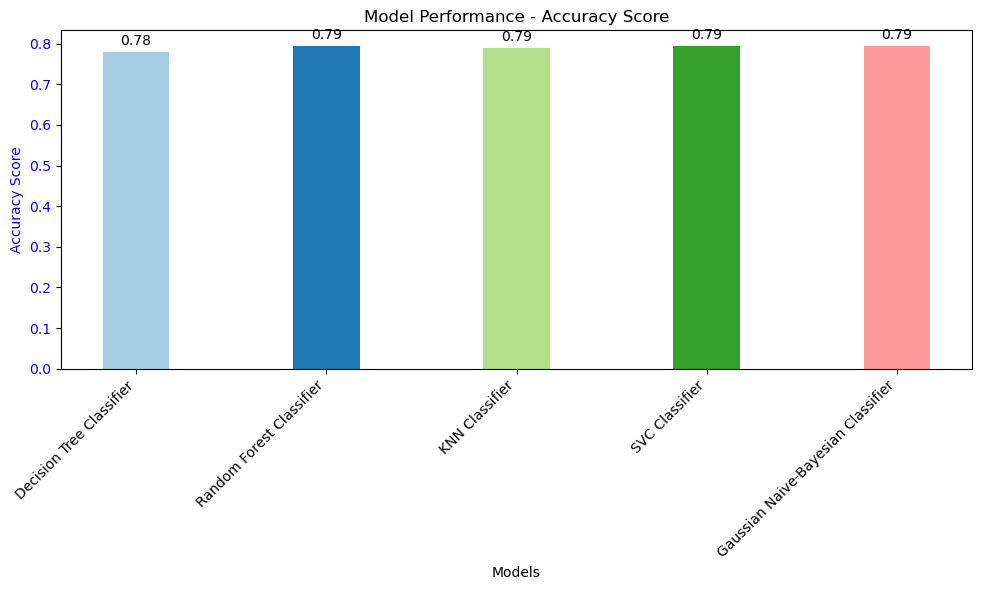

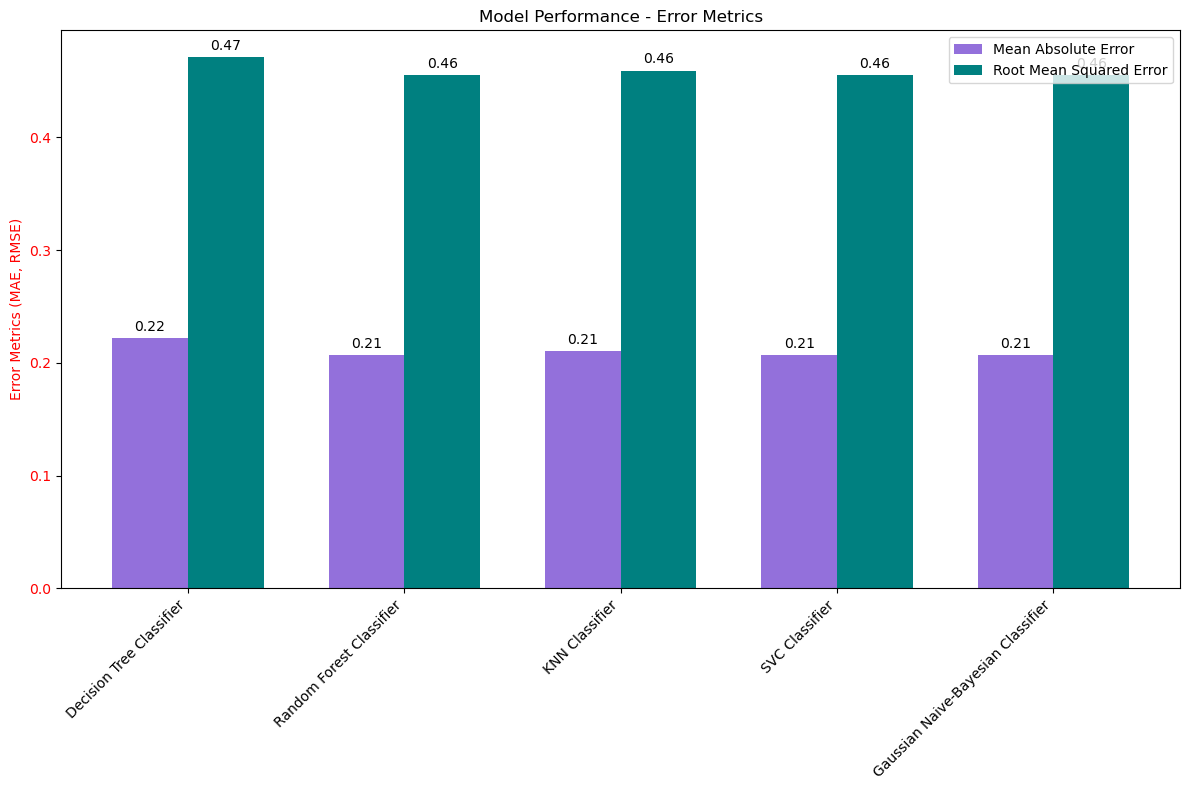

In [107]:
model_names = results_df['Model'] 
accuracy_values = results_df['Accuracy Score']
mae_values = results_df['Mean Absolute Error']
rmse_values = results_df['Root Mean Squared Error']

x = np.arange(len(model_names))  
width = 0.35  

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_accuracy = ax1.bar(x, accuracy_values, width, color=plt.cm.Paired.colors[:len(model_names)], label='Accuracy Score')

ax1.set_title('Model Performance - Accuracy Score')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy Score', color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

for bar in bar_accuracy:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()

fig, ax2 = plt.subplots(figsize=(12, 8))
bar_mae = ax2.bar(x - width / 2, mae_values, width, label='Mean Absolute Error', color='mediumpurple')
bar_rmse = ax2.bar(x + width / 2, rmse_values, width, label='Root Mean Squared Error', color='teal')

ax2.set_ylabel('Error Metrics (MAE, RMSE)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=45, ha='right')
ax2.set_title('Model Performance - Error Metrics')

for bars in [bar_mae, bar_rmse]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

ax2.legend()

plt.tight_layout()
plt.show()

From the above results, we can observe that Random Forest Classification  has the best accuracy score of 79%. 

Creating a custom input and classifying the output

In [108]:
Age=21
Gender='Female'
Blood_Pressure=122.0
Cholesterol_Level=175.0
Exercise_Habits="Low"
Smoking="No"
Family_Heart_Disease="No"
Diabetes="No"
BMI=20
High_Blood_Pressure="No"
Low_HDL_Cholesterol="No"
High_LDL_Cholesterol="No"
Alcohol_Consumption="Low"
Stress_Level="Medium"
Sleep_Hours=8
Sugar_Consumption="Low"
Triglyceride_Level=129.0
Fasting_Blood_Sugar=80
CRP_Level=10
Homocysteine_Level=5.961958073450258

x_custom=np.array([[Age,Gender,Blood_Pressure, Cholesterol_Level, Exercise_Habits, Smoking, Family_Heart_Disease, Diabetes, BMI,High_Blood_Pressure, Low_HDL_Cholesterol, High_LDL_Cholesterol,Alcohol_Consumption,Stress_Level,Sleep_Hours,Sugar_Consumption,Triglyceride_Level,Fasting_Blood_Sugar,CRP_Level,Homocysteine_Level]], dtype=object)

Encoding

In [110]:
x_custom[:,1] = gender_Encoder.transform(x_custom[:,1])
x_custom[:,4] = excercise_Encoder.transform(x_custom[:,4])
x_custom[:,5] = smoking_Encoder.transform(x_custom[:,5])
x_custom[:,6] = family_Encoder.transform(x_custom[:,6])
x_custom[:,7] = diabetes_Encoder.transform(x_custom[:,7])
x_custom[:,9] = high_bp_Encoder.transform(x_custom[:,9])
x_custom[:,10] = low_hdl_Encoder.transform(x_custom[:,10])
x_custom[:,11] = high_hdl_Encoder.transform(x_custom[:,11])
x_custom[:,12] = alcohol_Encoder.transform(x_custom[:,12])
x_custom[:,13] = stress_Encoder.transform(x_custom[:,13])
x_custom[:,15] = sugar_Encoder.transform(x_custom[:,15])

In [111]:
df_custom = pd.DataFrame(x_custom, columns=column_names)

[[21 0 122.0 175.0 1 0 0 0 20 0 0 0 1 2 8 1 129.0 80 10 5.961958073450258]]


Initialising Model

In [112]:

rfc=RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth= None, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='log2', min_samples_leaf=2)

Mapping Output

In [113]:
mapping={
    0:"No",
    1:"Yes"
}

Printing The Output

In [114]:

x_custom = ct.transform(df_custom)
y_custom=rfc.predict(x_custom)
print(mapping.get(y_custom[0]))

No


# Conclusion


This project implemented some popular classification models to determine the most effective algorithm for predicting heart disease based on the given data. By comparing accuracy scores and error metrics, the project identified the Random Forest classification  algorithm as the most suitable model for this dataset. Random Forest classification was ultimately used to predict heart disease for both sample input data and custom user input.